In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [ ]:
#data set from kaggle. ATP match results from 2000-2016.

In [3]:
matches = pd.DataFrame.from_csv('data/tennismatches.csv',index_col=None, encoding='ISO-8859-1')
matches.head()

,atp,location,tournament,day,month,year,date,series,court,surface,...,l2,w3,l3,w4,l4,w5,l5,wsets,lsets,comment
0,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
2,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
3,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
4,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed


### Which players has the most match wins?

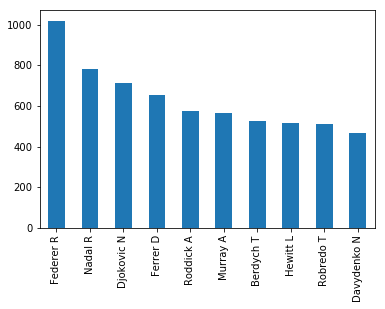

In [4]:
matches.winner.value_counts().head(10).plot(kind='bar')

In [ ]:
#I am not surprised to see Federer, Nadal and Djokovic respectively with the most wins.
#I've heard sports columnist and talk show hosts refer to these players as the Big 3.

### Plot the # of wins by the Big 3 over time

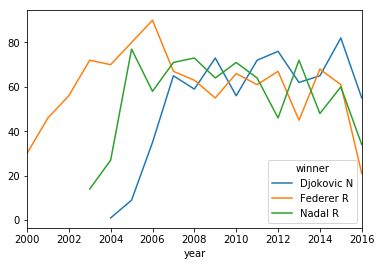

In [5]:
big3=matches[(matches.winner=='Federer R') | (matches.winner=='Nadal R') | (matches.winner=='Djokovic N')]
big3.groupby(['winner','year']).size().unstack('winner').plot(kind='line')

In [ ]:
#The data set spans from 2000 to part of 2016. You can see Federer had an earlier start. From 200-2004 he had 274 wins
#From 2006-2016 wins were evenly distributed with a modeate beta value year-over-year
#Djokovic seems to be trending up, while the other two have negative slope curves

### Does surface have an affect. If yes to what advantage is it?

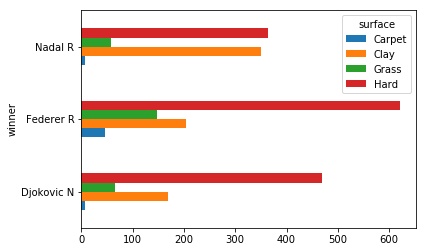

In [6]:
big3=matches[(matches.winner=='Federer R') | (matches.winner=='Nadal R') | (matches.winner=='Djokovic N')]
big3.groupby(['winner','surface']).size().unstack('surface').plot(kind='barh')

In [ ]:
#Nadal is a clay court specialist
#Federer has had a higher proportion of grass court wins
#There are a larger number of hard court tournaments which favors Federer and Djokovic

### Which city has hosted the most tournaments

In [7]:
m=matches[matches.round=='Final']
m.location.value_counts().head(10)

KeyError: False

### What was the ATP ranking of the winner of each Grand Slam?

In [8]:
gs=matches[(matches.series=='Grand Slam') & (matches.round=='Final')].sort_values('year')
gs=gs[gs.wrank.notnull()]
gs#.plot(x='year',y='wrank',kind='scatter')

,atp,location,tournament,day,month,year,date,series,court,surface,...,l2,w3,l3,w4,l4,w5,l5,wsets,lsets,comment


In [ ]:
#There are four grand slam tournaments a year. I was curious how often an underdog won it